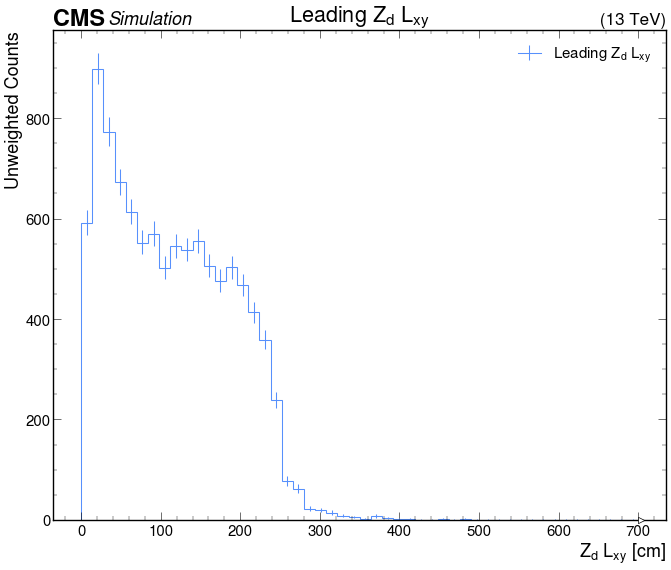

<Figure size 500x500 with 0 Axes>

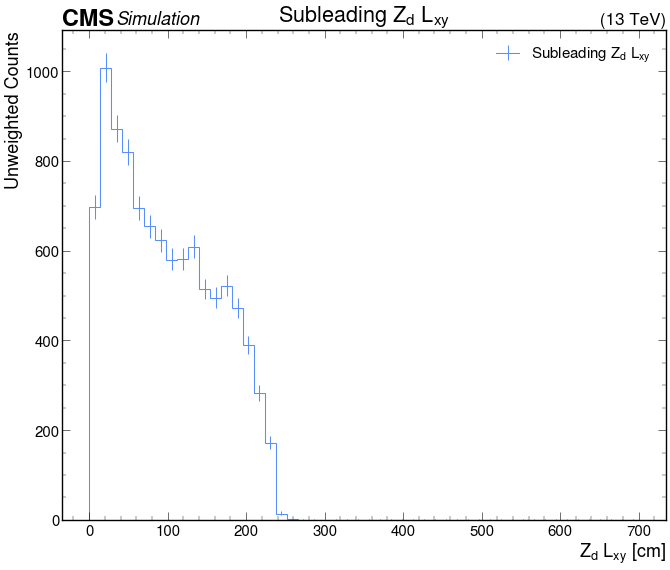

In [11]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
# local
sys.path.insert(1, str(os.getcwd()).split("/sidm")[0])
from sidm.tools import utilities
# always reload local modules to pick up changes during development
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
from sidm.tools.utilities import lxy
import mplhep as hep
import hist as Hist
import hist.intervals

def makeLxyHist(lxy):
    h = Hist.Hist(Hist.axis.Regular(50, 0, 700, name="Lxy", label="$Z_d$ $L_{xy}$ [cm]"))

    h.fill(lxy)

    return h    

## Can set this to whichever file you need
file_path = 'root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2024/nanoaodYear2024.root'

## Loading in the root file in NanoAODSchema
events = NanoEventsFactory.from_root(
    {file_path: "Events"},
    schemaclass=NanoAODSchema,
).events()

## Setting up Zd cuts
genACut = abs(events['GenPart']['pdgId']) == 32
genParticles = events['GenPart']
genAs = genParticles[genACut]

## order by pt
sorted_idx = ak.argsort(genAs.pt, axis=1, ascending=True)
genAs = genAs[sorted_idx]

## getting lxy of the dark photons
genALxy = lxy(genAs, use_v=False)
leadingGenALxy = genALxy[:,1]
subleadingGenALxy = genALxy[:,0]

## making the hist objects
leadingGenALxyHist = makeLxyHist(leadingGenALxy)
subleadingGenALxyHist = makeLxyHist(subleadingGenALxy)

## plotting
## leading zd
fig, ax = plt.subplots(figsize=(14, 12))
ax.set_title("Leading $Z_d$ $L_{xy}$")
ax.set_ylabel("Unweighted Counts")
hep.cms.label(ax=ax)
hep.histplot(leadingGenALxyHist, ax=ax, label="Leading $Z_d$ $L_{xy}$", histtype="step", density=False)
ax.legend()
fig.tight_layout()
plt.show()
plt.clf()

## subleading zd
fig, ax = plt.subplots(figsize=(14, 12))
ax.set_title("Subleading $Z_d$ $L_{xy}$")
ax.set_ylabel("Unweighted Counts")
hep.cms.label(ax=ax)
hep.histplot(subleadingGenALxyHist, ax=ax, label="Subleading $Z_d$ $L_{xy}$", histtype="step", density=False)
ax.legend()
fig.tight_layout()
plt.show()